In [3]:
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/workspaces/ERP_Newsletter/data/data03_newsletter_items_clean/items_all_themes.csv")

In [5]:
df.head()

,id,newsletter_number,issue_date,theme,subtheme,title,description,link,new_theme
0,c97ff62f-83ca-47ec-a4c7-b4e24157ae0a,1,11 July 2023,Calls for evidence,NaN,Deadline 23 August 2023,Education secretary Gillian Keegan has launche...,https://schoolsweek.co.uk/chatgpt-keegan-launc...,political_environment_key_organisations
1,e66a8dd2-0dce-444a-876c-3c8137ea2985,1,11 July 2023,DfE,NaN,Revealed: the experts advising ministers on te...,The Department for Education has appointed an ...,https://schoolsweek.co.uk/revealed-the-experts...,political_environment_key_organisations
2,2ce7fa71-0b07-417c-a7d3-8d18e8f12716,1,11 July 2023,DfE,NaN,"Reject fewer teacher applicants, DfE tells tra...","Susan Acland-Hood, the DfE's permanent secreta...",https://schoolsweek.co.uk/reject-fewer-teacher...,political_environment_key_organisations
3,64c74d6d-b558-4183-a42d-e7f0141ce527,1,11 July 2023,DfE,NaN,Ofqual and DfE studying 'feasibility' of 'full...,Some exam boards are already piloting on-scree...,https://schoolsweek.co.uk/teachers-back-digita...,political_environment_key_organisations
4,5564ff61-bf33-482f-9010-32aea9ce1f73,1,11 July 2023,What are the politicians saying?,NaN,Revealed: The full details of Labour's educati...,Entitled 'Breaking down the barrier to opportu...,https://schoolsweek.co.uk/revealed-the-full-de...,political_environment_key_organisations


In [6]:
df['new_theme'].value_counts().head(10)

new_theme
political_environment_key_organisations    222
what_matters_ed                            184
teacher_rrd                                178
edtech                                     167
erp_project                                148
policy_practice_research                   147
four_nations                               112
events_opportunities_research               34
Name: count, dtype: int64

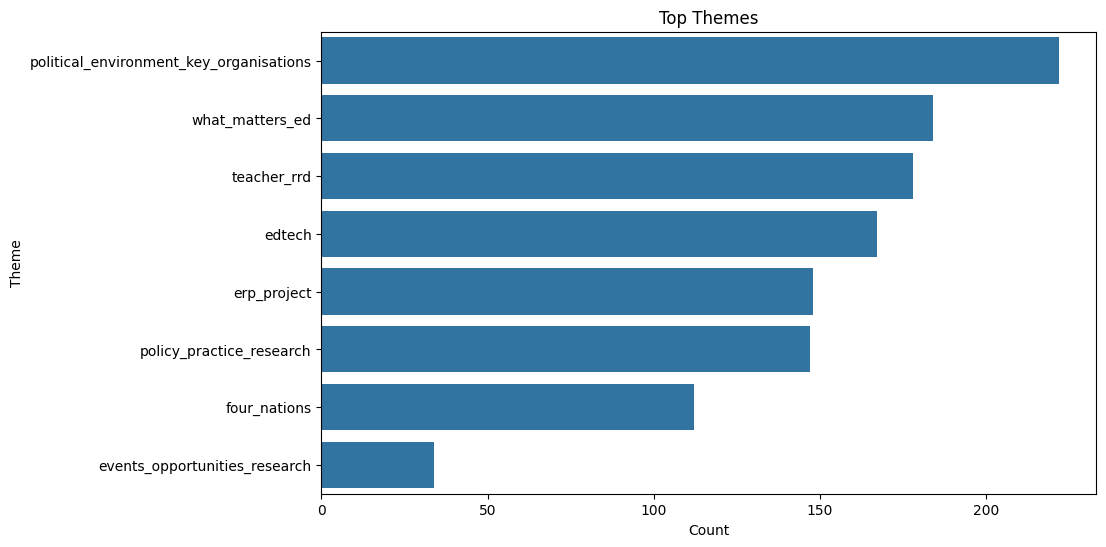

In [7]:
theme_counts = df['new_theme'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=theme_counts.values, y=theme_counts.index)
plt.title("Top Themes")
plt.xlabel("Count")
plt.ylabel("Theme")
plt.show()

In [8]:
# group by MONTH and THEME
theme_time = (
    df.groupby([pd.Grouper(key='issue_date', freq='M'), 'new_theme'])
      .size()
      .reset_index(name='count')
)

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=theme_time,
    x='issue_date',
    y='count',
    hue='new_theme',
    marker='o'
)

plt.title("Themes Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_32114/273843567.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby([pd.Grouper(key='issue_date', freq='M'), 'new_theme'])


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [10]:
org_table = df['organisation'].value_counts().reset_index()
org_table.columns = ['organisation', 'count']

org_table.head(50)

,organisation,count
0,schools_week,143
1,uk_government,67
2,ucl,54
3,conversation,31
4,guardian,28
5,bera,26
6,nfer,24
7,epi,24
8,scottish_government,21
9,uk_parliament,21


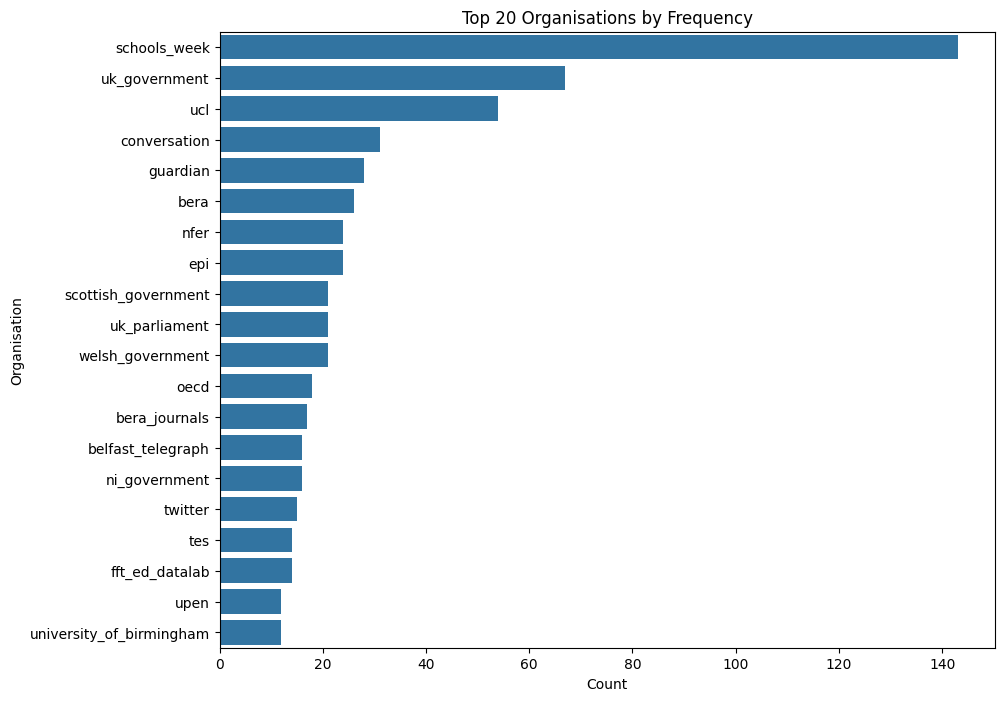

In [11]:
plt.figure(figsize=(10, 8))   # a bit taller for 20 labels

top20 = org_counts.head(20)

sns.barplot(x=top20.values, y=top20.index)

plt.xlabel("Count")
plt.ylabel("Organisation")
plt.title("Top 20 Organisations by Frequency")

plt.show()


In [15]:
org_time = df_top.groupby(['issue_date', 'organisation']).size().reset_index(name='count')

/tmp/ipykernel_3526/1395032945.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(key='issue_date', freq='M'), 'organisation'])


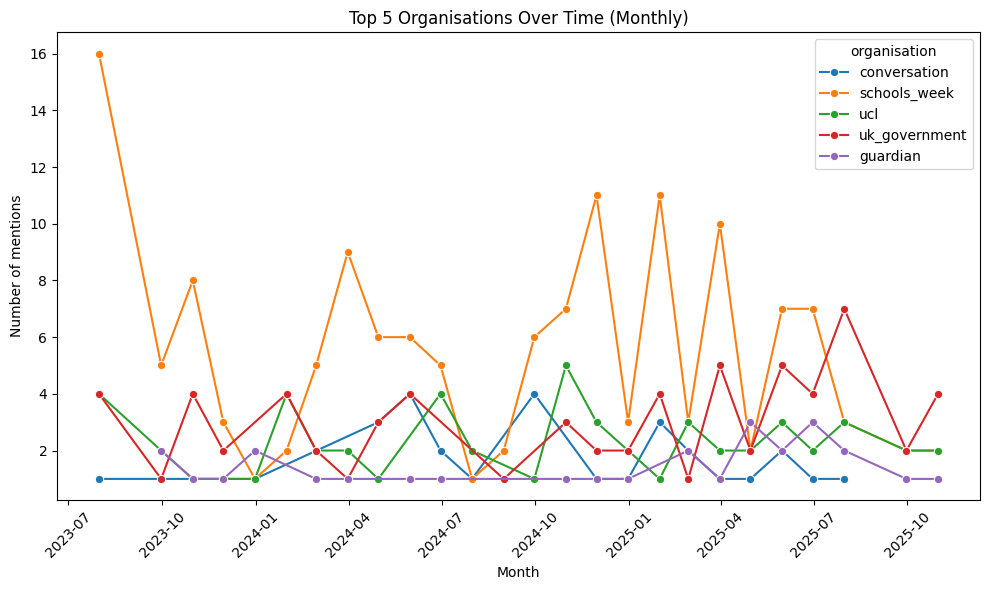

In [18]:
# make sure issue_date is datetime
df['issue_date'] = pd.to_datetime(df['issue_date'])

# pick top 5 orgs
org_counts = df['organisation'].value_counts()
top_orgs = org_counts.head(5).index

df_top = df[df['organisation'].isin(top_orgs)].copy()

# group by month + organisation
org_time = (
    df_top
    .groupby([pd.Grouper(key='issue_date', freq='M'), 'organisation'])
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(10, 6))
sns.lineplot(data=org_time, x='issue_date', y='count', hue='organisation', marker='o')
plt.title("Top 5 Organisations Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Number of mentions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

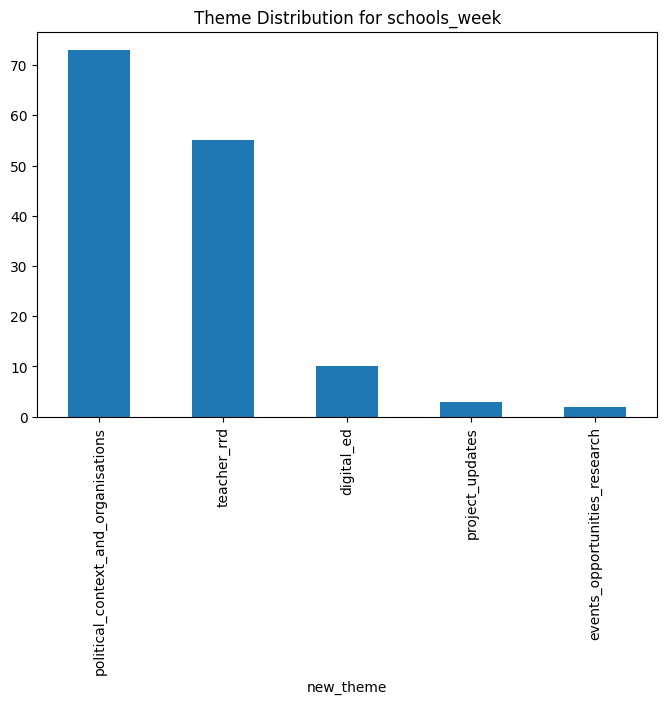

In [22]:
#theme distribution for single organisation 
org_name = "schools_week"   # change this
df[df['organisation'] == org_name]['new_theme'].value_counts().plot(
    kind='bar',
    figsize=(8, 5),
    title=f"Theme Distribution for {org_name}"
)
plt.show()